In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

profiles = pd.read_csv('../datasets/profiles.csv')
financials = pd.read_csv('../datasets/financials.csv')

# Startup Profiles

In [2]:
profiles.head()

,name,tagline,website,summary,concepts,keywords,sentiment,articles
0,Valera Health,"Your Path to Wellness, Just a Click Away",https://valerahealth.com,"Valera Health, based in New York, is a mental ...",['Comprehensive mental healthcare services for...,"['Mental Health Care', 'Telemedicine', 'Health...","{'sentimentScore': 100, 'cntPositive': 15, 'cn...",[{'contentId': 'ab325015a7bbae7beefc4833b73696...
1,Bestow,"Protecting Life, Simplified",https://bestow.com,Bestow is a Texas-based company that offers fa...,['Offers fast and affordable term life insuran...,"['Insurance', 'Technology', 'Healthcare', 'Fin...","{'sentimentScore': 90, 'cntPositive': 48, 'cnt...",[{'contentId': 'b633176d-6378-46d0-9b15-d2b611...
2,Mediktor,"Revolutionizing Healthcare, One AI-Powered Dia...",https://mediktor.com,Mediktor is a company based in Catalonia that ...,['Specializes in AI-driven healthcare technolo...,"['Healthcare Technology', 'Artificial Intellig...","{'sentimentScore': 100, 'cntPositive': 8, 'cnt...",[{'contentId': 'cb5d965c-68e4-4f44-a4e9-07ac8d...
3,OROS,"Adventure Awaits, Effortlessly Warm",https://orosapparel.com,OROS is a company based in Ohio that specializ...,['Pioneering SOLARCORE® insulation technology ...,"['Outdoor Apparel', 'Sporting Goods', 'Textile...","{'sentimentScore': 97, 'cntPositive': 8, 'cntN...",[{'contentId': 'a705cacc-2f24-4313-8410-6826ff...
4,Caura,Your All-in-One Car Companion,https://caura.com,Caura is a company based in England that offer...,['Comprehensive platform for all car-related s...,"['Automotive', 'Insurance', 'Mobile Applicatio...","{'sentimentScore': 95, 'cntPositive': 12, 'cnt...",[{'contentId': '8617db0b-f027-4bb6-b874-012a36...


In [3]:
profiles.isnull().sum()

name         0
tagline      0
website      0
summary      0
concepts     0
keywords     0
sentiment    0
articles     0
dtype: int64

# Startup Financials

In [4]:
financials.head()

,name,website,investor_count,funding_count,funding_total,funding_last_type,funding_last,funding_last_date,valuation,valuation_date,revenue_year,revenue_total
0,Valera Health,https://valerahealth.com,20.0,8.0,76.32M,Series B - II,9.12M,"April 9, 2024",NaN,NaN,NaN,NaN
1,Bestow,https://bestow.com,8.0,5.0,138.1M,Series C,70M,"December 16, 2020",NaN,NaN,NaN,NaN
2,PlainID,https://plainid.com,10.0,5.0,99M,Series C,75M,"December 21, 2021",$48M,December 2020,NaN,NaN
3,Snapcart,https://snapcart.global,9.0,4.0,14.7M,Series A,10M,"October 25, 2017",NaN,NaN,NaN,NaN
4,Slice,https://sliceit.com,36.0,21.0,390.5M,Debt - VIII,7.77M,"July 19, 2024","$1,800M",June 2022,NaN,NaN


In [5]:
len(financials)

6872

In [6]:
financials.isnull().sum()

name                    0
website                 0
investor_count         63
funding_count         452
funding_total         452
funding_last_type       0
funding_last         1763
funding_last_date      94
valuation            6007
valuation_date       6007
revenue_year         6609
revenue_total        6609
dtype: int64

1.6494742654969665


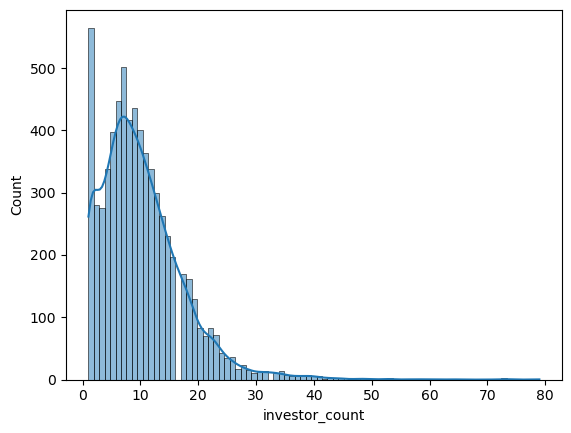

In [7]:
investor_count_mean = financials['investor_count'].mean(skipna=True)
investor_count_median = financials['investor_count'].median(skipna=True)
investor_count_mode = financials['investor_count'].mode()

investor_count_skew = financials['investor_count'].skew(skipna=True)
print(investor_count_skew)
sns.histplot(financials['investor_count'], kde=True)
plt.show()

In [8]:
financials['investor_count'].fillna(investor_count_median, inplace=True)
financials['investor_count'].isnull().sum()

0

1.5323303010400173


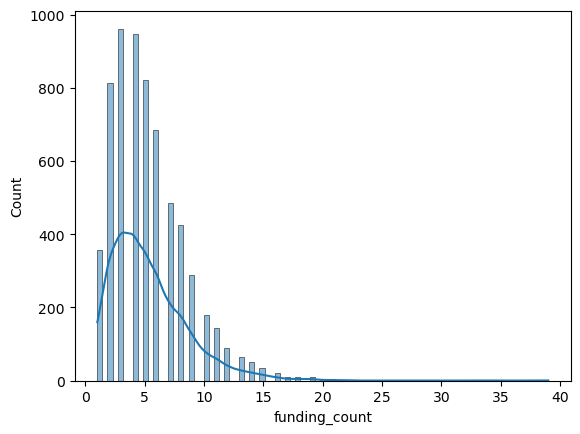

In [9]:
funding_count_mean = financials['funding_count'].mean(skipna=True)
funding_count_median = financials['funding_count'].median(skipna=True)
funding_count_mode = financials['funding_count'].mode()

funding_count_skew = financials['funding_count'].skew(skipna=True)
print(funding_count_skew)
sns.histplot(financials['funding_count'], kde=True)
plt.show()

In [10]:
financials['funding_count'].fillna(funding_count_median, inplace=True)
financials['funding_count'].isnull().sum()

0

In [11]:
financials['funding_total_numeric_millions'] = (
    financials['funding_total'].astype(str)
    .str.replace('M', '', regex=False)
    .str.replace('B', '', regex=False)
    .str.replace('K', '', regex=False)
    .astype(float)
    * financials['funding_total'].apply(
    lambda x: 1 if 'M' in str(x) else 1000 if 'B' in str(x) else (1/1000) if 'K' in str(x) else 1)
)
financials['funding_total_numeric_millions']

0        76.32
1       138.10
2        99.00
3        14.70
4       390.50
         ...  
6867       NaN
6868      6.50
6869      0.05
6870       NaN
6871       NaN
Name: funding_total_numeric_millions, Length: 6872, dtype: float64

32.32460129641798


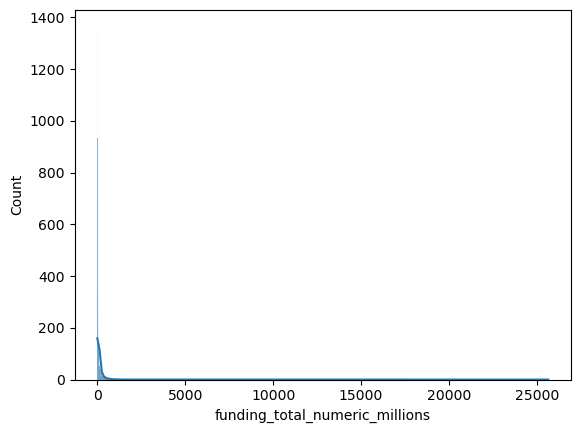

In [12]:
funding_total_mean = financials['funding_total_numeric_millions'].mean(skipna=True)
funding_total_median = financials['funding_total_numeric_millions'].median(skipna=True)
funding_total_mode = financials['funding_total_numeric_millions'].mode()

funding_total_skew = financials['funding_total_numeric_millions'].skew(skipna=True)
print(funding_total_skew)
sns.histplot(financials['funding_total_numeric_millions'], kde=True)
plt.show()

In [13]:
financials['funding_total_numeric_millions'].fillna(funding_total_median, inplace=True)
financials['funding_total_numeric_millions'].isnull().sum()

0

In [14]:
financials['funding_last_numeric_millions'] = (
    financials['funding_last'].astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('M', '', regex=False)
    .str.replace('B', '', regex=False)
    .str.replace('K', '', regex=False)
    .astype(float)
    * financials['funding_last'].apply(
    lambda x: 1 if 'M' in str(x) else 1000 if 'B' in str(x) else (1/1000) if 'K' in str(x) else 1)
)
financials['funding_last_numeric_millions']

0        9.12
1       70.00
2       75.00
3       10.00
4        7.77
        ...  
6867      NaN
6868     6.50
6869      NaN
6870      NaN
6871      NaN
Name: funding_last_numeric_millions, Length: 6872, dtype: float64

25.899998200754062


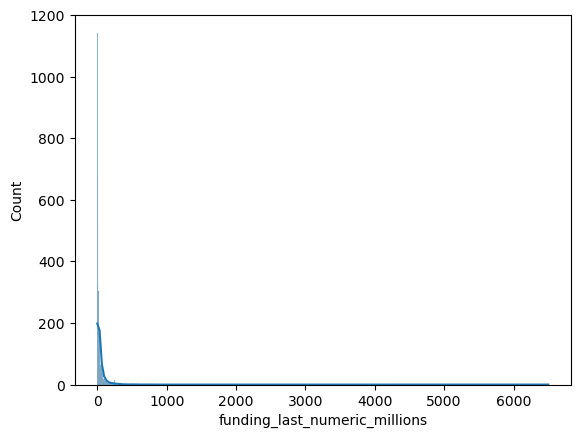

In [15]:
funding_last_mean = financials['funding_last_numeric_millions'].mean(skipna=True)
funding_last_median = financials['funding_last_numeric_millions'].median(skipna=True)
funding_last_mode = financials['funding_last_numeric_millions'].mode()

funding_last_skew = financials['funding_last_numeric_millions'].skew(skipna=True)
print(funding_last_skew)
sns.histplot(financials['funding_last_numeric_millions'], kde=True)
plt.show()

In [16]:
financials['funding_last_numeric_millions'].fillna(funding_last_median, inplace=True)
financials['funding_last_numeric_millions'].isnull().sum()

0

In [17]:
financials.drop(['funding_total', 'funding_last', 'funding_last_date'], axis=1, inplace=True)
financials.head()

,name,website,investor_count,funding_count,funding_last_type,valuation,valuation_date,revenue_year,revenue_total,funding_total_numeric_millions,funding_last_numeric_millions
0,Valera Health,https://valerahealth.com,20.0,8.0,Series B - II,NaN,NaN,NaN,NaN,76.32,9.12
1,Bestow,https://bestow.com,8.0,5.0,Series C,NaN,NaN,NaN,NaN,138.10,70.00
2,PlainID,https://plainid.com,10.0,5.0,Series C,$48M,December 2020,NaN,NaN,99.00,75.00
3,Snapcart,https://snapcart.global,9.0,4.0,Series A,NaN,NaN,NaN,NaN,14.70,10.00
4,Slice,https://sliceit.com,36.0,21.0,Debt - VIII,"$1,800M",June 2022,NaN,NaN,390.50,7.77


In [18]:
financials_noval_norev = financials.drop(['valuation', 'valuation_date', 'revenue_year', 'revenue_total'], axis=1)
financials_noval_norev.head()

,name,website,investor_count,funding_count,funding_last_type,funding_total_numeric_millions,funding_last_numeric_millions
0,Valera Health,https://valerahealth.com,20.0,8.0,Series B - II,76.32,9.12
1,Bestow,https://bestow.com,8.0,5.0,Series C,138.10,70.00
2,PlainID,https://plainid.com,10.0,5.0,Series C,99.00,75.00
3,Snapcart,https://snapcart.global,9.0,4.0,Series A,14.70,10.00
4,Slice,https://sliceit.com,36.0,21.0,Debt - VIII,390.50,7.77


In [19]:
#splitting up valuation and revenue rows into a new dataframe 
#these tables won't match up with the profiles dataframe bc there's fewer rows

In [20]:
financials_clean = financials.fillna(0)
financials_clean.head()

financials_valuation = financials_clean[financials_clean['valuation'] != 0]
financials_valuation.head()

#print(financials_valuation['valuation'].isnull().sum())
#print(financials_valuation['valuation_date'].isnull().sum())

,name,website,investor_count,funding_count,funding_last_type,valuation,valuation_date,revenue_year,revenue_total,funding_total_numeric_millions,funding_last_numeric_millions
2,PlainID,https://plainid.com,10.0,5.0,Series C,$48M,December 2020,0.0,0,99.00,75.00
4,Slice,https://sliceit.com,36.0,21.0,Debt - VIII,"$1,800M",June 2022,0.0,0,390.50,7.77
23,DispatchHealth,https://dispatchhealth.com,15.0,8.0,Series E,"$1,700M",March 2021,0.0,0,740.96,259.00
34,ONE,https://groupone-holdings.com,11.0,5.0,Series G,"$1,000M",December 2021,0.0,0,536.00,50.00
47,Survios,https://survios.com,14.0,5.0,Series D,$30M,October 2015,0.0,0,70.95,16.70


In [21]:
financials_valuation['valuations_numeric_millions'] = (
    financials_valuation['valuation'].astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('M', '', regex=False)
    .str.replace('B', '', regex=False)
    .str.replace('K', '', regex=False)
    .str.replace('$', '', regex=False)
    .astype(float)
    * financials_valuation['valuation'].apply(
    lambda x: 1 if 'M' in str(x) else 1000 if 'B' in str(x) else (1/1000) if 'K' in str(x) else 1)
)
financials_valuation.head()

financials_valuation['valuations_numeric_millions'].isnull().sum()

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_11787/1559169083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financials_valuation['valuations_numeric_millions'] = (


0

In [22]:
financials_clean = financials.fillna(0)

financials_revenue = financials_clean[financials_clean['revenue_total'] != 0]

#print(financials_revenue['revenue_total'].isnull().sum())
#print(financials_revenue['revenue_year'].isnull().sum())

In [23]:
financials_revenue['revenue_numeric_millions'] = (
    financials_revenue['revenue_total'].astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('M', '', regex=False)
    .str.replace('B', '', regex=False)
    .str.replace('T', '', regex=False)
    .str.replace('K', '', regex=False)
    .str.replace('$', '', regex=False)
    .astype(float)
    * financials_revenue['revenue_total'].apply(
    lambda x: 1 if 'M' in str(x) else 1000 if 'B' in str(x) else 1000000 if 'T' in str(x) else (1/1000) if 'K' in str(x) else 1)
)
financials_revenue.head()

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_11787/333473298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financials_revenue['revenue_numeric_millions'] = (


,name,website,investor_count,funding_count,funding_last_type,valuation,valuation_date,revenue_year,revenue_total,funding_total_numeric_millions,funding_last_numeric_millions,revenue_numeric_millions
8,Ant Group,https://antgroup.com,28.0,12.0,Loan - II,0,0,2019.0,17.15B,25646.00,6500.0,17150.00
28,LivSpace,https://livspace.com,21.0,11.0,Series F,0,0,2019.0,11.29M,371.69,180.0,11.29
48,Ironclad,https://ironcladapp.com,16.0,9.0,Series E,$950M,October 2020,2019.0,10M,331.12,150.0,10.00
69,AI21 Labs,https://ai21.com,15.0,6.0,Series C - II,"$1,400M",August 2023,2022.0,22M,317.00,53.0,22.00
102,Klaim,https://klaim.ai,9.0,6.0,Seed VC - II,0,0,2021.0,2.9M,7.72,5.0,2.90


In [24]:
financials_clean.insert(11, 'valuations_numeric_millions', financials_valuation['valuations_numeric_millions'], True)
financials_clean.insert(12, 'revenue_numeric_millions', financials_revenue['revenue_numeric_millions'], True)
financials_clean = financials_clean.drop(['valuation', 'revenue_total'], axis=1)
financials_clean.fillna(0)

,name,website,investor_count,funding_count,funding_last_type,valuation_date,revenue_year,funding_total_numeric_millions,funding_last_numeric_millions,valuations_numeric_millions,revenue_numeric_millions
0,Valera Health,https://valerahealth.com,20.0,8.0,Series B - II,0,0.0,76.32,9.12,0.0,0.0
1,Bestow,https://bestow.com,8.0,5.0,Series C,0,0.0,138.10,70.00,0.0,0.0
2,PlainID,https://plainid.com,10.0,5.0,Series C,December 2020,0.0,99.00,75.00,48.0,0.0
3,Snapcart,https://snapcart.global,9.0,4.0,Series A,0,0.0,14.70,10.00,0.0,0.0
4,Slice,https://sliceit.com,36.0,21.0,Debt - VIII,June 2022,0.0,390.50,7.77,1800.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6867,Nimblex,https://getnimblex.com,1.0,5.0,Acquired,0,0.0,26.00,13.00,0.0,0.0
6868,Terminal 49,https://terminal49.com,10.0,2.0,Series A,0,0.0,6.50,6.50,0.0,0.0
6869,A&K Robotics,https://aandkrobotics.com,1.0,2.0,Incubator/Accelerator,0,0.0,0.05,13.00,0.0,0.0
6870,Workpays,https://workpays.me,2.0,5.0,Acquired,0,0.0,26.00,13.00,0.0,0.0


In [39]:
#financials_clean['valuations_numeric_millions'].fillna(0)
#financials_clean['revenue_numeric_millions'].fillna(0)

financials_valuation_revenue = financials_clean[
    (financials_clean['valuations_numeric_millions'].fillna(0) != 0) & (financials_clean['revenue_numeric_millions'].fillna(0) != 0)
]

financials_valuation_revenue.head()

#print(financials_valuation['valuation'].isnull().sum())
#print(financials_valuation['valuation_date'].isnull().sum())


,name,website,investor_count,funding_count,funding_last_type,valuation_date,revenue_year,funding_total_numeric_millions,funding_last_numeric_millions,valuations_numeric_millions,revenue_numeric_millions
48,Ironclad,https://ironcladapp.com,16.0,9.0,Series E,October 2020,2019.0,331.12,150.0,950.0,10.00
69,AI21 Labs,https://ai21.com,15.0,6.0,Series C - II,August 2023,2022.0,317.00,53.0,1400.0,22.00
226,AgentSync,https://agentsync.io,12.0,5.0,Series B - II,December 2021,2019.0,161.10,50.0,1200.0,1.90
234,OrCam Technologies,https://orcam.com,6.0,5.0,Incubator/Accelerator,February 2018,2017.0,77.40,13.0,1030.4,10.00
272,FreshMenu,https://freshmenu.com,8.0,7.0,Unattributed VC - III,August 2019,2020.0,32.56,7.0,50.0,19.53


**financials_valuation_revenue is the dataframe created where there are values for both valuations and revenue**

**financials_noval_norev contains only the funding information**

# Startups (combined Profiles and Financials)

Combined dataframe is called inner_join.

In [26]:
inner_join = pd.merge(profiles, financials, on='website', how='inner')
inner_join.head()

,name_x,tagline,website,summary,concepts,keywords,sentiment,articles,name_y,investor_count,funding_count,funding_last_type,valuation,valuation_date,revenue_year,revenue_total,funding_total_numeric_millions,funding_last_numeric_millions
0,Valera Health,"Your Path to Wellness, Just a Click Away",https://valerahealth.com,"Valera Health, based in New York, is a mental ...",['Comprehensive mental healthcare services for...,"['Mental Health Care', 'Telemedicine', 'Health...","{'sentimentScore': 100, 'cntPositive': 15, 'cn...",[{'contentId': 'ab325015a7bbae7beefc4833b73696...,Valera Health,20.0,8.0,Series B - II,NaN,NaN,NaN,NaN,76.32,9.12
1,Bestow,"Protecting Life, Simplified",https://bestow.com,Bestow is a Texas-based company that offers fa...,['Offers fast and affordable term life insuran...,"['Insurance', 'Technology', 'Healthcare', 'Fin...","{'sentimentScore': 90, 'cntPositive': 48, 'cnt...",[{'contentId': 'b633176d-6378-46d0-9b15-d2b611...,Bestow,8.0,5.0,Series C,NaN,NaN,NaN,NaN,138.10,70.00
2,PlainID,"Secure Your Identity, Empower Your Business",https://plainid.com,PlainID is a company based in Tel Aviv that sp...,['PlainID offers the Identity Security Posture...,"['Cybersecurity', 'Identity Management', 'Data...","{'sentimentScore': 100, 'cntPositive': 21, 'cn...",[{'contentId': '29c3c127-069d-4be7-aaf6-3a89bb...,PlainID,10.0,5.0,Series C,$48M,December 2020,NaN,NaN,99.00,75.00
3,Snapcart,"Innovating Connections, Empowering Insights",https://snapcart.global,Snapcart is a commercial company based in Jaka...,['AI-powered technology with over 400 machine ...,"['Artificial Intelligence & Machine Learning',...","{'sentimentScore': 92, 'cntPositive': 7, 'cntN...",[{'contentId': '5ffd28ae-d4f3-46e2-a3b1-526c96...,Snapcart,9.0,4.0,Series A,NaN,NaN,NaN,NaN,14.70,10.00
4,slice,"Experience Money, Mastered.",https://sliceit.com,slice is a financial technology company based ...,"['Trusted by over 17 million Indians', 'Offers...","['FinTech', 'ConsumerTech', 'E-Commerce', 'Dig...","{'sentimentScore': 89, 'cntPositive': 36, 'cnt...",[{'contentId': 'ce75fa10-6d0f-45d5-bf66-2532b8...,Slice,36.0,21.0,Debt - VIII,"$1,800M",June 2022,NaN,NaN,390.50,7.77


In [27]:
inner_join.drop('name_y', axis=1, inplace=True)
inner_join.rename(columns={'name_x':'name'}, inplace=True)
inner_join.head()

,name,tagline,website,summary,concepts,keywords,sentiment,articles,investor_count,funding_count,funding_last_type,valuation,valuation_date,revenue_year,revenue_total,funding_total_numeric_millions,funding_last_numeric_millions
0,Valera Health,"Your Path to Wellness, Just a Click Away",https://valerahealth.com,"Valera Health, based in New York, is a mental ...",['Comprehensive mental healthcare services for...,"['Mental Health Care', 'Telemedicine', 'Health...","{'sentimentScore': 100, 'cntPositive': 15, 'cn...",[{'contentId': 'ab325015a7bbae7beefc4833b73696...,20.0,8.0,Series B - II,NaN,NaN,NaN,NaN,76.32,9.12
1,Bestow,"Protecting Life, Simplified",https://bestow.com,Bestow is a Texas-based company that offers fa...,['Offers fast and affordable term life insuran...,"['Insurance', 'Technology', 'Healthcare', 'Fin...","{'sentimentScore': 90, 'cntPositive': 48, 'cnt...",[{'contentId': 'b633176d-6378-46d0-9b15-d2b611...,8.0,5.0,Series C,NaN,NaN,NaN,NaN,138.10,70.00
2,PlainID,"Secure Your Identity, Empower Your Business",https://plainid.com,PlainID is a company based in Tel Aviv that sp...,['PlainID offers the Identity Security Posture...,"['Cybersecurity', 'Identity Management', 'Data...","{'sentimentScore': 100, 'cntPositive': 21, 'cn...",[{'contentId': '29c3c127-069d-4be7-aaf6-3a89bb...,10.0,5.0,Series C,$48M,December 2020,NaN,NaN,99.00,75.00
3,Snapcart,"Innovating Connections, Empowering Insights",https://snapcart.global,Snapcart is a commercial company based in Jaka...,['AI-powered technology with over 400 machine ...,"['Artificial Intelligence & Machine Learning',...","{'sentimentScore': 92, 'cntPositive': 7, 'cntN...",[{'contentId': '5ffd28ae-d4f3-46e2-a3b1-526c96...,9.0,4.0,Series A,NaN,NaN,NaN,NaN,14.70,10.00
4,slice,"Experience Money, Mastered.",https://sliceit.com,slice is a financial technology company based ...,"['Trusted by over 17 million Indians', 'Offers...","['FinTech', 'ConsumerTech', 'E-Commerce', 'Dig...","{'sentimentScore': 89, 'cntPositive': 36, 'cnt...",[{'contentId': 'ce75fa10-6d0f-45d5-bf66-2532b8...,36.0,21.0,Debt - VIII,"$1,800M",June 2022,NaN,NaN,390.50,7.77


In [28]:
inner_join.shape[0]

5550

In [29]:
inner_join.to_csv('../datasets/startups.csv', index=False) 